In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

As the images have been already split between a training set and a validation set, the ratio between the two sets would be calculated

In [2]:
df_train = pd.read_csv("MURA-v1.1/train_image_paths.csv", header=None)
df_val = pd.read_csv("MURA-v1.1/valid_image_paths.csv", header=None)

In [3]:
print("df_train Percentage:", df_train.count()[0]/(df_train.count()[0]+df_val.count()[0])*100)
print("df_val Percentage:", df_val.count()[0]/(df_train.count()[0]+df_val.count()[0])*100)

df_train Percentage: 92.0084989376328
df_val Percentage: 7.991501062367204


The split between the total training set is 92% whilst the validation set consists of approximately 8% of the total dataset, these data are further split into 7 categories. *ELBOW*, *FINGER*, *FOREARM*, *HAND*, *HUMERUS*, *SHOULDER*, and *WRIST*. To know the split between all of these categories, the data needs to be preprocessed and put onto a table

In [4]:
df_train[0] = df_train[0].astype(str)
df_val[0] = df_val[0].astype(str)

These two datasets would be joined together as to make it easier to preprocess

In [5]:
df = pd.concat([df_train, df_val], axis=0, ignore_index = True)

In [6]:
#Split image path
imageSplit= df[0].str.split('/', n=5, expand=True)

In [7]:
df['ImageSet'] = imageSplit[1]
df['ImageType'] = imageSplit[2]
df['Diagnosis'] = imageSplit[4].str.split('_', n=1, expand=True)[1]
df = df.rename(columns={0: 'ImagePath'})
#Change positives to 1s and Negatives to 0
df.loc[df['Diagnosis'] == 'positive', 'Diagnosis'] = 1
df.loc[df['Diagnosis'] == 'negative', 'Diagnosis'] = 0

In [8]:
df.head()

,ImagePath,ImageSet,ImageType,Diagnosis
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,train,XR_SHOULDER,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,train,XR_SHOULDER,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,train,XR_SHOULDER,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,train,XR_SHOULDER,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,train,XR_SHOULDER,1


In [9]:
#Image distribution per each ImageType and ImageSet
imageDist = df[['ImageSet', 'ImageType']].value_counts()

In [10]:
imageDist

ImageSet  ImageType  
train     XR_WRIST       9752
          XR_SHOULDER    8379
          XR_HAND        5543
          XR_FINGER      5106
          XR_ELBOW       4931
          XR_FOREARM     1825
          XR_HUMERUS     1272
valid     XR_WRIST        659
          XR_SHOULDER     563
          XR_ELBOW        465
          XR_FINGER       461
          XR_HAND         460
          XR_FOREARM      301
          XR_HUMERUS      288
dtype: int64

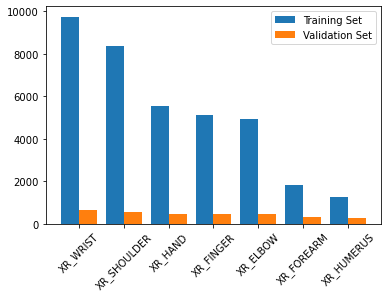

In [11]:
#Visualize Distribution
n = len(imageDist)//2
imageTypes = []
for imageType in imageDist.keys()[:n]:
    imageTypes.append(imageType[1])

x_axis = np.arange(n)

plt.bar(x_axis-0.2, imageDist[:n], width=0.4, label='Training Set')
plt.bar(x_axis+0.2, imageDist[n:], width=0.4, label="Validation Set")
plt.xticks(x_axis, imageTypes, rotation=45)
plt.legend()
plt.show()

From the following graph, the distribution between the ImageTypes is not equal. The Humerus radiographs appears to have the lowest number of samples ith about less than 1600 total samples from the training set and validation set.

In [12]:
imageDistTrain = imageDist.to_numpy()[:n]
imageDistVal = imageDist.to_numpy()[n:]
imageTrainPercentage = imageDistTrain/(imageDistTrain+imageDistVal)*100

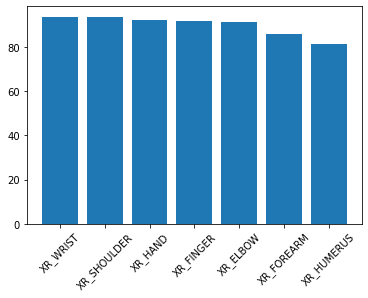

In [13]:
plt.bar(x_axis, imageTrainPercentage)
plt.xticks(x_axis, imageTypes, rotation=45)
plt.show()

It appears that the distribution between the training set and validation set is not equal through each of the radiograph type

### Comparison of Image Diagnosis Distribution per Body Part

In [19]:
imageDiag = df[['ImageType', 'Diagnosis']].value_counts()
imageDiag

ImageType    Diagnosis
XR_WRIST     0            6129
XR_SHOULDER  0            4496
             1            4446
XR_HAND      0            4330
XR_WRIST     1            4282
XR_FINGER    0            3352
XR_ELBOW     0            3160
             1            2236
XR_FINGER    1            2215
XR_HAND      1            1673
XR_FOREARM   0            1314
XR_HUMERUS   0             821
XR_FOREARM   1             812
XR_HUMERUS   1             739
dtype: int64

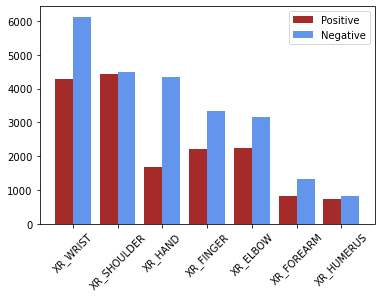

In [20]:
#Visualize Distribution between Diagnosis of each body part
pDiag = []
nDiag = []
for itype in imageTypes:
    nDiag.append(imageDiag[(itype, 0)])
    pDiag.append(imageDiag[(itype, 1)])
    
x_axis = np.arange(n)

plt.bar(x_axis-0.2, pDiag, width=0.4, label='Positive', color = 'brown')
plt.bar(x_axis+0.2, nDiag, width=0.4, label="Negative", color = 'cornflowerblue')
plt.xticks(x_axis, imageTypes, rotation=45)
plt.legend()
plt.show()
#Delete variables to free memory
del imageDiag, pDiag, nDiag, imageDistTrain, imageDistVal, imageTrainPercentage, x_axis

It appears that in some cases, the distribution between the number of positive cases and negative cases per bone is not equal to each other.

The image dimension of each images would be taken to see if the image dimensions are similar to each other in all categories

In [16]:
height = []
width = []
for ipath in df['ImagePath']:
    image = Image.open(ipath)
    height.append(image.height)
    width.append(image.width)
    image.close()
df['Height'] = height
df['Width'] = width
df

,ImagePath,ImageSet,ImageType,Diagnosis,Height,Width
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,train,XR_SHOULDER,1,512,380
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,train,XR_SHOULDER,1,512,303
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,train,XR_SHOULDER,1,410,512
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,train,XR_SHOULDER,1,413,512
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,train,XR_SHOULDER,1,512,440
...,...,...,...,...,...,...
40000,MURA-v1.1/valid/XR_FINGER/patient11967/study1_...,valid,XR_FINGER,0,512,407
40001,MURA-v1.1/valid/XR_FINGER/patient11967/study1_...,valid,XR_FINGER,0,512,407
40002,MURA-v1.1/valid/XR_FINGER/patient11738/study1_...,valid,XR_FINGER,0,512,406
40003,MURA-v1.1/valid/XR_FINGER/patient11738/study1_...,valid,XR_FINGER,0,512,406


In [23]:
df[['Height', 'Width']].value_counts()

0
Height Width      
512    406    6366
406    512    2009
512    407    1901
       379    1895
       420    1620
...            ...
250    512       1
251    512       1
252    512       1
254    512       1
132    512       1

[752 rows x 1 columns]

The height and the width of each images in the dataset varies, where-in there are 752 unique image sizes, where the most common image size is 512 x 406